# Diplomatura en Ciencia de Datos UTN FRC
## Modulo 4

### Trabajo práctico 

#### Alumno: Pavelek Israel

Los objetivos principales del proyecto son dos:

1. Entrenar una red neuronal, utilizando el framework keras, que permita estimar el precio de un vehículo a partir de las mismas features utilizado en el modelo ya calculado.

2. Evaluar la performance del modelo a partir de la relación de las métricas utilizadas y de la función de costo a lo largo de las épocas e iterarlo:

Aumentar la complejidad (número de neuronas, capas)
Testear al menos 3 optimizadores.
Evaluar utilizando los datos escalados / sin escalar.
Aumentar la cantidad de épocas de entrenamiento.
Incorporar early stopping a la función de entrenamiento.
3. Obtener conclusiones tanto sobre la mejor configuración para el modelo en cuestión, como en su comparación con el modelo ya entrenado en el notebook como baseline.

# Descripcion

Craigslist es uno de los vendedores más grandes de autos usados.

# Importando Librerias

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Importo datos

In [2]:
df=pd.read_csv("./vehicles.csv")

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
df.shape

(426880, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# Limpieza de datos

In [7]:
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


Se puede ver que hay algunas observaciones muy generales para usar

In [8]:
df= df.drop(columns=['id','url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long','county','region', 'state','posting_date'], axis=1)

In [9]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


# Manejo de outliers

Veamos si hay outliers en el Target.

In [11]:
quantile1, quantile3= np.percentile(df['price'],[10,90])

In [12]:
print(quantile1,quantile3)

500.0 37590.0


In [13]:
df=df[(df.price < 37590.0) & (df.price >= 500 )]
df.shape

(341976, 14)

Lets observe the odometer column

In [14]:
r=sorted(df["odometer"])
r[:100]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

Hay nan y 0.0

In [15]:
df["odometer"].isna().sum()

1889

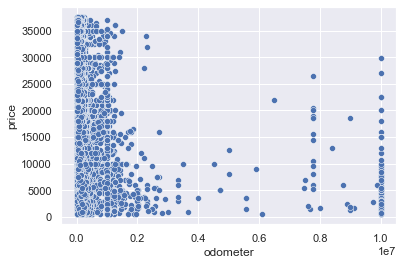

In [16]:
ax = sns.scatterplot(x="odometer", y="price", data=df)

In [17]:
df["odometer"].max()

10000000.0

In [18]:
df.drop(df[df["odometer"]==0.0].index,inplace=True)

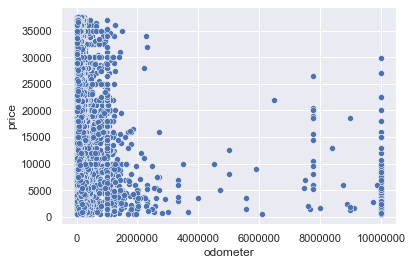

In [19]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [20]:
df["odometer"].isna().sum()

1889

podriamos considerar los valores por encima de 3000000 como raros

In [21]:
df=df[(df.odometer < 3000000)]

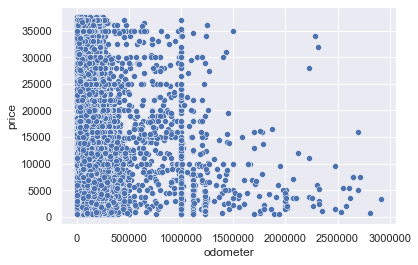

In [22]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)

In [23]:
df["odometer"].isna().sum()

0

In [24]:
df["year"].isna().sum()

564

In [25]:
df["year"].min()

1900.0

In [26]:
df=df.dropna(subset=['year'])

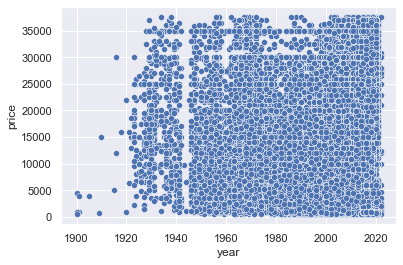

In [27]:
bx = sns.scatterplot(x="year", y="price", data=df)

In [28]:
df=df[(df.year > 1940)]

Manejamos outliers en las 3 cols numericas

# Valores Nulos

In [29]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,23685500,70.112
cylinders,13587200,40.220
condition,12300600,36.411
drive,10397800,30.779
paint_color,9788300,28.974
type,7443300,22.033
manufacturer,1214900,3.596
title_status,569800,1.687
model,364100,1.078
fuel,193200,0.572


In [30]:
df.condition.value_counts()

good         104845
excellent     85091
like new      17147
fair           6511
new             688
salvage         537
Name: condition, dtype: int64

In [31]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [32]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 88559.06
Excellent average odometer: 111490.68
Good average odometer: 86519.99
Fair average odometer: 176593.35
Salvage average odometer: 168648.03


In [33]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

In [34]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [35]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,23685500,70.112
cylinders,13587200,40.220
drive,10397800,30.779
paint_color,9788300,28.974
type,7443300,22.033
manufacturer,1214900,3.596
title_status,569800,1.687
model,364100,1.078
fuel,193200,0.572
transmission,128800,0.381


Eliminamos los q tienen menos de 5%.

In [36]:
df=df.dropna(subset=['title_status','fuel','transmission','model','manufacturer'])

Elimino size porq tiene demasiados nulos

In [37]:
df=df.drop(["size"],axis=1)

In [38]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)


,null,percent
cylinders,12616300,40.192
drive,9401600,29.951
paint_color,8698200,27.710
type,6798300,21.658
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000


In [39]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')

In [40]:
df['type'] = df['type'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')

In [41]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           3
type            0
paint_color     0
dtype: int64

In [42]:
df=df.dropna(subset=['cylinders','drive'])

In [43]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

# EDA

In [44]:
from scipy import stats

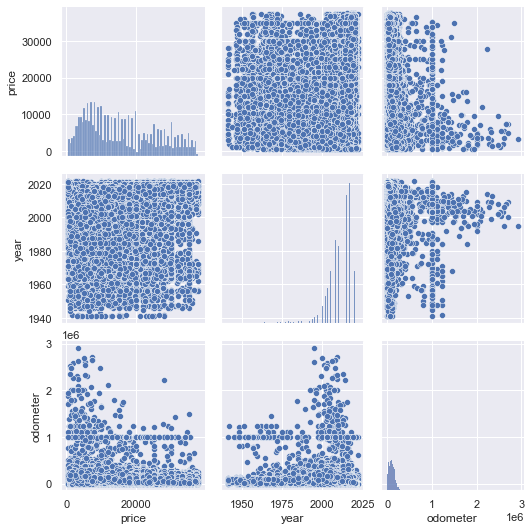

In [45]:
sns.pairplot(df)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313894 entries, 31 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         313894 non-null  int64  
 1   year          313894 non-null  float64
 2   manufacturer  313894 non-null  object 
 3   model         313894 non-null  object 
 4   condition     313894 non-null  object 
 5   cylinders     313894 non-null  object 
 6   fuel          313894 non-null  object 
 7   odometer      313894 non-null  float64
 8   title_status  313894 non-null  object 
 9   transmission  313894 non-null  object 
 10  drive         313894 non-null  object 
 11  type          313894 non-null  object 
 12  paint_color   313894 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 33.5+ MB


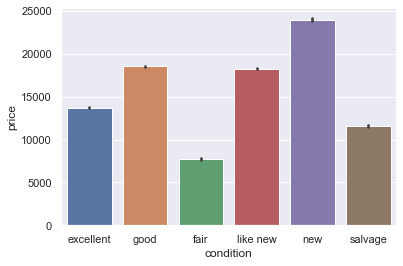

In [47]:
ax = sns.barplot(x="condition", y="price", data=df)

Vehiculos nuevos son claramente mas caros

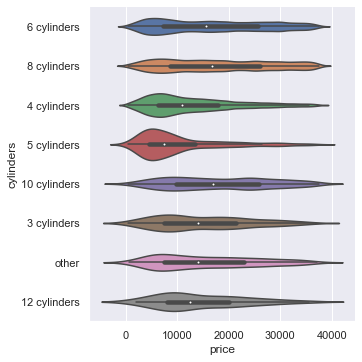

In [48]:
sns.catplot(y="cylinders", x="price",kind = "violin", data=df)

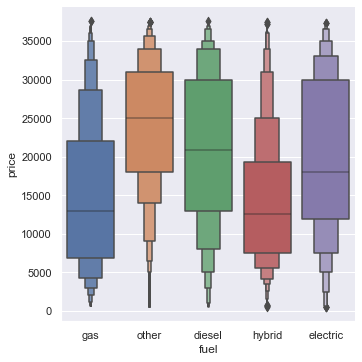

In [49]:
sns.catplot(x="fuel", y="price", kind="boxen",
            data=df)

Podemos describir donde se encuentran la mayoría de los vehículos por tipo de combustible
Gas=5k-17k

diesel=12k-20k

hybrid=7k-15k

other=11k-20k

electric=10k-18k

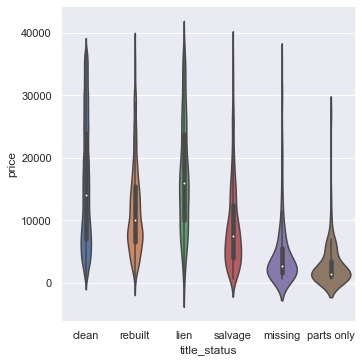

In [50]:
sns.catplot(x="title_status", y="price",kind="violin", data=df)

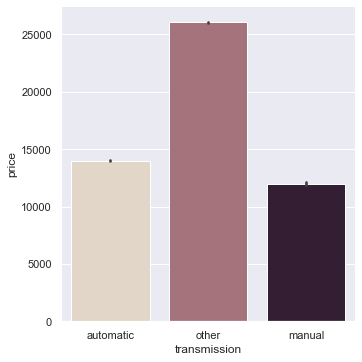

In [51]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df)

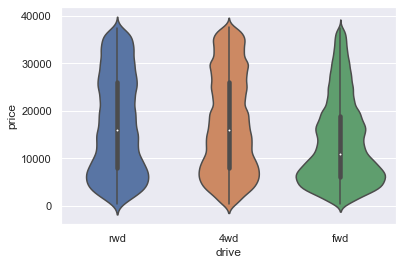

In [52]:
sns.violinplot(x=df.drive, y=df.price);

There doesnt seem too be much difference between the first 2 types of drives .

The third one is a bit different.

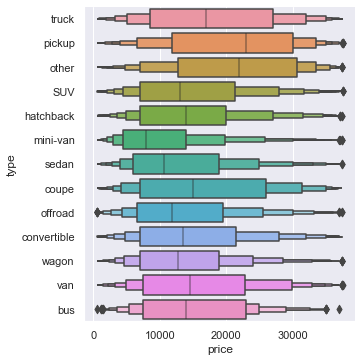

In [53]:
sns.catplot(y="type", x="price",kind="boxen", data=df);

Important observation can be obtained from the above figure regarding the price bracket for each type of vehicle.

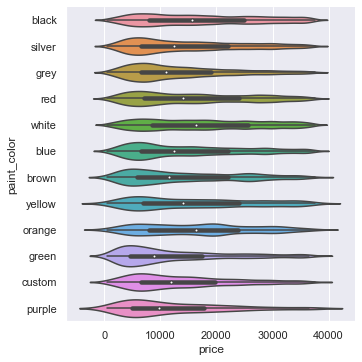

In [54]:
sns.catplot(y="paint_color", x="price",kind="violin", data=df);

Important observation can be obtained from the above figure regarding the distribution of price bracket for each color of vehicle.

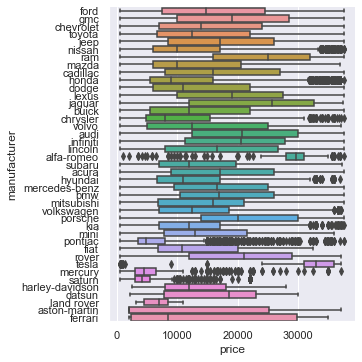

In [55]:
sns.catplot(y="manufacturer", x="price",kind="box", data=df);

It just gives and idea about prices based on the manufacturer.

#  Label Processing


In [56]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [57]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color'],
      dtype='object')

In [58]:
df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color']]=df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color']].apply(le.fit_transform)

# Split Train and Test data


In [59]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [60]:
y= df.price
X= df.drop('price',axis=1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(251115, 12) (251115,)
(62779, 12) (62779,)


# Training Model

# Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [64]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [65]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(X_test,y_test)*100)

Mean Absolute Error: 2003.45
Mean Squared Error: 12978866.54
Root Mean Squared Error: 3602.62
86.94112567921167


# Ahora Ustedes. Construyan una red neuronal, con un modelo secuencial, y la utilización de capas densas, para realizar una regresión. Recuerden que los pasos para construirla son:

Instanciar el modelo

Agregar las capas

Compilar el modelo seleccionando optimizador, función de pérdida y métricas

Entrenar, seleccionando split de validación y épocas.

Graficar la pérdida y exactitud en train y test

Reevaluar el modelo, cambiar capas, neuronas, activación, optimizadores, etc.

###  Primer modelo en crudo

In [66]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale
from keras.losses import mean_squared_error
from sklearn.metrics import r2_score
from keras.utils.vis_utils import  plot_model

In [67]:
Y= df.price
X= df.drop('price',axis=1)

In [68]:
X.head()

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
31,2013.0,13,7458,0,5,2,128000.0,0,0,2,10,0
32,2012.0,14,14600,2,6,2,68696.0,0,2,0,8,0
33,2016.0,7,14786,2,5,2,29499.0,0,2,0,8,9
34,2019.0,38,15829,0,5,2,43000.0,0,0,0,10,5
35,2016.0,7,4746,2,5,2,17302.0,0,2,0,8,8


### Se paración del set 

In [69]:
X_train_net, X_test_net, y_train_net,y_test_net= train_test_split(X, Y, test_size=0.2, random_state=42)

In [70]:
X_train_net, X_val_net, y_train_net,y_val_net= train_test_split(X_train_net, y_train_net, test_size=0.2, random_state=42)

In [71]:
X_train_net.shape
inputs=X_train_net.shape[1]

Se utilizan 6 capas con funcion de activación ReLu dado que al no escalar los precios no deberian de haber ningun precio negativo. 

In [72]:
model = Sequential()
model.add(Dense(inputs, input_dim=inputs, activation='relu'))
model.add(Dense(inputs, activation='relu'))
model.add(Dense(inputs, activation='relu'))
model.add(Dense(inputs, activation='relu'))
model.add(Dense(inputs, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mae', 'mse'])


In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 793
Trainable params: 793
Non-trainable params: 0
__________________________________________________________

Función de EarlyStopping para frenar el entrenamiento cuando no evolucion más.

In [74]:
stopper=EarlyStopping(monitor='val_loss',min_delta=0,patience=6,verbose=1,mode='auto')

In [75]:
history=model.fit(X_train_net, y_train_net, epochs=200,validation_data=(X_val_net,y_val_net),callbacks=stopper,verbose=2)


Epoch 1/200
6278/6278 - 3s - loss: 71463752.0000 - mae: 6526.8857 - mse: 71463752.0000 - val_loss: 60562544.0000 - val_mae: 6263.6182 - val_mse: 60562544.0000
Epoch 2/200
6278/6278 - 2s - loss: 61444228.0000 - mae: 6141.0830 - mse: 61444228.0000 - val_loss: 59665588.0000 - val_mae: 6124.1265 - val_mse: 59665588.0000
Epoch 3/200
6278/6278 - 3s - loss: 60182224.0000 - mae: 6079.4922 - mse: 60182224.0000 - val_loss: 57834844.0000 - val_mae: 5824.4429 - val_mse: 57834844.0000
Epoch 4/200
6278/6278 - 2s - loss: 58927212.0000 - mae: 6007.8926 - mse: 58927212.0000 - val_loss: 57252568.0000 - val_mae: 6083.6421 - val_mse: 57252568.0000
Epoch 5/200
6278/6278 - 3s - loss: 58124584.0000 - mae: 5959.9346 - mse: 58124584.0000 - val_loss: 56488568.0000 - val_mae: 5916.5234 - val_mse: 56488568.0000
Epoch 6/200
6278/6278 - 3s - loss: 56928200.0000 - mae: 5894.6118 - mse: 56928200.0000 - val_loss: 56552436.0000 - val_mae: 5754.1357 - val_mse: 56552436.0000
Epoch 7/200
6278/6278 - 2s - loss: 56166784.00

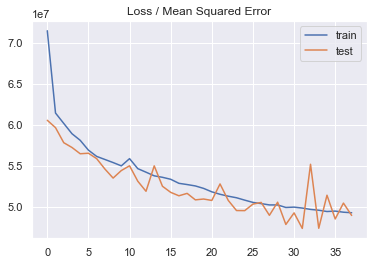

In [76]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()
predict=model.predict(X_test_net)

In [77]:
print(predict)

[[29920.383]
 [ 8835.378]
 [22713.148]
 ...
 [27279.262]
 [13358.376]
 [30413.676]]


In [78]:
y_test_net

372858    29590
68417      3400
138155    31874
270292     7999
384278    23590
          ...  
208731     8900
293989    11495
282535    30990
116713    22995
234579    30590
Name: price, Length: 62779, dtype: int64

In [79]:
print("Mean squered  error between test_labels and predictios is: {}".format(mean_squared_error(y_test_net,predict)))

Mean squered  error between test_labels and predictios is: [3.0236544e+08 1.4614517e+08 1.4894616e+08 ... 2.3408454e+08 1.0474643e+08
 3.1666458e+08]


In [80]:
print("R2 score between test_labels and predictios is: {}".format(r2_score(y_test_net,predict)))

R2 score between test_labels and predictios is: 0.5009757026124213


Se obtuvo un R2 score del 50% Ya que las variables no se encuentran escaladas, ni muy trabajadas. 

### Ahora vamos a trabajar un poco más los datos y  a escalarlos.

In [111]:
X= df

Primero eliminamos fabrincantes que tengan menos de 100 unidades y modelos que tengan menos de 50 unidades. 

Dado que el modelo ya incluye la información del fabricante no es necesario incluir las dos columnas, nos quedamos con la columna de modelo.

In [112]:
X = X.groupby('manufacturer').filter(lambda x: len(x) > 100)
X = X.groupby('model').filter(lambda x: len(x) > 50)
X= X.drop(columns=['manufacturer'],axis=1)


In [113]:
X.shape

(228888, 12)

Para que el modelo performe mejor, creamos una columna por cada variable que no podemos evaluar con un numero. 

In [114]:
X=pd.get_dummies(data=X, columns=['model','cylinders','fuel','title_status','transmission','drive','type','paint_color'])


In [115]:
pd.set_option('display.max_columns', None)
X.head()

,price,year,condition,odometer,model_36,model_38,model_67,model_95,model_108,model_124,model_142,model_151,model_162,model_167,model_179,model_210,model_262,model_268,model_269,model_297,model_317,model_350,model_353,model_452,model_461,model_560,model_564,model_668,model_736,model_763,model_780,model_791,model_805,model_821,model_837,model_861,model_867,model_888,model_911,model_920,model_927,model_984,model_1006,model_1048,model_1077,model_1091,model_1115,model_1125,model_1134,model_1168,model_1272,model_1290,model_1292,model_1327,model_1337,model_1355,model_1360,model_1432,model_1441,model_1466,model_1474,model_1485,model_1510,model_1512,model_1555,model_1563,model_1568,model_1634,model_1654,model_1679,model_1742,model_1826,model_1980,model_2029,model_2068,model_2069,model_2094,model_2116,model_2120,model_2156,model_2158,model_2159,model_2169,model_2171,model_2200,model_2216,model_2240,model_2244,model_2261,model_2264,model_2266,model_2287,model_2304,model_2307,model_2338,model_2365,model_2405,model_2418,model_2435,model_2448,model_2461,model_2536,model_2543,model_2552,model_2608,model_2658,model_2723,model_2730,model_2733,model_2739,model_2765,model_2774,model_2788,model_2822,model_2832,model_2855,model_2867,model_2886,model_2968,model_2972,model_3024,model_3116,model_3187,model_3198,model_3269,model_3303,model_3358,model_3362,model_3393,model_3411,model_3430,model_3449,model_3516,model_3525,model_3543,model_3557,model_3560,model_3595,model_3678,model_3715,model_3744,model_3753,model_3761,model_3789,model_3802,model_3807,model_3816,model_3840,model_3858,model_3872,model_3884,model_3891,model_3917,model_3934,model_3952,model_3961,model_4001,model_4009,model_4046,model_4055,model_4095,model_4117,model_4141,model_4151,model_4156,model_4159,model_4165,model_4166,model_4181,model_4182,model_4193,model_4219,model_4247,model_4271,model_4296,model_4392,model_4397,model_4418,model_4428,model_4457,model_4471,model_4483,model_4493,model_4506,model_4511,model_4523,model_4528,model_4532,model_4550,model_4571,model_4604,model_4614,model_4656,model_4665,model_4696,model_4705,model_4724,model_4741,model_4742,model_4743,model_4746,model_4777,model_4797,model_4808,model_4823,model_4847,model_4860,model_4877,model_4884,model_4891,model_4898,model_4910,model_4929,model_4960,model_4970,model_4992,model_5010,model_5020,model_5066,model_5077,model_5090,model_5092,model_5098,model_5127,model_5132,model_5153,model_5172,model_5190,model_5215,model_5252,model_5263,model_5267,model_5274,model_5301,model_5308,model_5323,model_5346,model_5347,model_5355,model_5361,model_5365,model_5394,model_5402,model_5446,model_5462,model_5475,model_5477,model_5517,model_5535,model_5596,model_5617,model_5627,model_5682,model_5708,model_5728,model_5751,model_5820,model_5856,model_5862,model_5892,model_5982,model_5994,model_6003,model_6026,model_6035,model_6041,model_6044,model_6046,model_6059,model_6098,model_6111,model_6137,model_6263,model_6268,model_6294,model_6299,model_6303,model_6320,model_6329,model_6335,model_6346,model_6354,model_6370,model_6374,model_6408,model_6417,model_6423,model_6432,model_6449,model_6476,model_6489,model_6520,model_6543,model_6545,model_6549,model_6560,model_6572,model_6575,model_6607,model_6619,model_6648,model_6651,model_6654,model_6673,model_6680,model_6686,model_6695,model_6717,model_6719,model_6726,model_6728,model_6737,model_6748,model_6753,model_6760,model_6772,model_6801,model_6820,model_6841,model_6879,model_6893,model_6896,model_6934,model_6962,model_6985,model_6990,model_6995,model_7013,model_7035,model_7043,model_7050,model_7053,model_7061,model_7070,model_7096,model_7104,model_7121,model_7125,model_7145,model_7154,model_7169,model_7197,model_7204,model_7208,model_7228,model_7289,model_7337,model_7361,model_7442,model_7458,model_7468,model_7501,model_7546,model_7555,model_7613,model_7652,model_7659,model_7707,model_7729,model_7786,model_7796,model_7808,model_7848,model_7862,model_7899,model_7900,model_7913,model_7919,model_7

In [116]:
X.shape

(228888, 1007)

In [117]:
X.describe()

price           year      condition      odometer  \
count  228888.000000  228888.000000  228888.000000  2.288880e+05   
mean    15518.028389    2011.372121       1.952282  1.019508e+05   
std      9951.016862       7.001175       1.644098  7.481427e+04   
min       500.000000    1941.000000       0.000000  1.000000e+00   
25%      6995.000000    2008.000000       0.000000  4.845475e+04   
50%     13589.500000    2013.000000       2.000000  9.800000e+04   
75%     22999.250000    2016.000000       3.000000  1.426550e+05   
max     37587.000000    2022.000000       5.000000  2.711913e+06   

            model_36       model_38       model_67       model_95  \
count  228888.000000  228888.000000  228888.000000  228888.000000   
mean        0.000651       0.000345       0.000384       0.013172   
std         0.025506       0.018575       0.019604       0.114013   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

           model_108      model_124      model_142      model_151  \
count  228888.000000  228888.000000  228888.000000  228888.000000   
mean        0.000756       0.000336       0.000267       0.001673   
std         0.027482       0.018338       0.016323       0.040872   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

           model_162      model_167      model_179      model_210  \
count  228888.000000  228888.000000  228888.000000  228888.000000   
mean        0.000585       0.001468       0.000306       0.000350   
std         0.024189       0.038286       0.017485       0.018692   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

           model_262      model_268      model_269      model_297  \
count  228888.000000  228888.000000  228888.000000  228888.000000   
mean        0.000454       0.000406       0.000760       0.000511   
std         0.021311       0.020153       0.027561       0.022603   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

           model_317      model_350      model_353      model_452  \
count  228888.000000  228888.000000  228888.000000  228888.000000   
mean        0.000568       0.000232       0.000262       0.002936   
std         0.023825       0.015215       0.016189       0.054105   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

           model_461      model_560     model_564     model_668  \
count  228888.000000  228888.000000  228888.00000  228888.00000   
mean        0.000384       0.006562       0.00031       0.00024   
std         0.019604       0.080741       0.01761       0.01550   
min         0.000000    

### Escalado de variables

In [118]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

for column in ['year','price','condition', 'odometer']:
    X[column] = std_scaler.fit_transform(X[column].values.reshape(-1,1)) 

In [119]:
X.head()

,price,year,condition,odometer,model_36,model_38,model_67,model_95,model_108,model_124,model_142,model_151,model_162,model_167,model_179,model_210,model_262,model_268,model_269,model_297,model_317,model_350,model_353,model_452,model_461,model_560,model_564,model_668,model_736,model_763,model_780,model_791,model_805,model_821,model_837,model_861,model_867,model_888,model_911,model_920,model_927,model_984,model_1006,model_1048,model_1077,model_1091,model_1115,model_1125,model_1134,model_1168,model_1272,model_1290,model_1292,model_1327,model_1337,model_1355,model_1360,model_1432,model_1441,model_1466,model_1474,model_1485,model_1510,model_1512,model_1555,model_1563,model_1568,model_1634,model_1654,model_1679,model_1742,model_1826,model_1980,model_2029,model_2068,model_2069,model_2094,model_2116,model_2120,model_2156,model_2158,model_2159,model_2169,model_2171,model_2200,model_2216,model_2240,model_2244,model_2261,model_2264,model_2266,model_2287,model_2304,model_2307,model_2338,model_2365,model_2405,model_2418,model_2435,model_2448,model_2461,model_2536,model_2543,model_2552,model_2608,model_2658,model_2723,model_2730,model_2733,model_2739,model_2765,model_2774,model_2788,model_2822,model_2832,model_2855,model_2867,model_2886,model_2968,model_2972,model_3024,model_3116,model_3187,model_3198,model_3269,model_3303,model_3358,model_3362,model_3393,model_3411,model_3430,model_3449,model_3516,model_3525,model_3543,model_3557,model_3560,model_3595,model_3678,model_3715,model_3744,model_3753,model_3761,model_3789,model_3802,model_3807,model_3816,model_3840,model_3858,model_3872,model_3884,model_3891,model_3917,model_3934,model_3952,model_3961,model_4001,model_4009,model_4046,model_4055,model_4095,model_4117,model_4141,model_4151,model_4156,model_4159,model_4165,model_4166,model_4181,model_4182,model_4193,model_4219,model_4247,model_4271,model_4296,model_4392,model_4397,model_4418,model_4428,model_4457,model_4471,model_4483,model_4493,model_4506,model_4511,model_4523,model_4528,model_4532,model_4550,model_4571,model_4604,model_4614,model_4656,model_4665,model_4696,model_4705,model_4724,model_4741,model_4742,model_4743,model_4746,model_4777,model_4797,model_4808,model_4823,model_4847,model_4860,model_4877,model_4884,model_4891,model_4898,model_4910,model_4929,model_4960,model_4970,model_4992,model_5010,model_5020,model_5066,model_5077,model_5090,model_5092,model_5098,model_5127,model_5132,model_5153,model_5172,model_5190,model_5215,model_5252,model_5263,model_5267,model_5274,model_5301,model_5308,model_5323,model_5346,model_5347,model_5355,model_5361,model_5365,model_5394,model_5402,model_5446,model_5462,model_5475,model_5477,model_5517,model_5535,model_5596,model_5617,model_5627,model_5682,model_5708,model_5728,model_5751,model_5820,model_5856,model_5862,model_5892,model_5982,model_5994,model_6003,model_6026,model_6035,model_6041,model_6044,model_6046,model_6059,model_6098,model_6111,model_6137,model_6263,model_6268,model_6294,model_6299,model_6303,model_6320,model_6329,model_6335,model_6346,model_6354,model_6370,model_6374,model_6408,model_6417,model_6423,model_6432,model_6449,model_6476,model_6489,model_6520,model_6543,model_6545,model_6549,model_6560,model_6572,model_6575,model_6607,model_6619,model_6648,model_6651,model_6654,model_6673,model_6680,model_6686,model_6695,model_6717,model_6719,model_6726,model_6728,model_6737,model_6748,model_6753,model_6760,model_6772,model_6801,model_6820,model_6841,model_6879,model_6893,model_6896,model_6934,model_6962,model_6985,model_6990,model_6995,model_7013,model_7035,model_7043,model_7050,model_7053,model_7061,model_7070,model_7096,model_7104,model_7121,model_7125,model_7145,model_7154,model_7169,model_7197,model_7204,model_7208,model_7228,model_7289,model_7337,model_7361,model_7442,model_7458,model_7468,model_7501,model_7546,model_7555,model_7613,model_7652,model_7659,model_7707,model_7729,model_7786,model_7796,model_7808,model_7848,model_7862,model_7899,model_7900,model_7913,model_7919,model_7

In [120]:
Y= X.price
X= X.drop(columns=['price'],axis=1)

In [121]:
#X=(X-X.mean())/X.std()
X.head()

,year,condition,odometer,model_36,model_38,model_67,model_95,model_108,model_124,model_142,model_151,model_162,model_167,model_179,model_210,model_262,model_268,model_269,model_297,model_317,model_350,model_353,model_452,model_461,model_560,model_564,model_668,model_736,model_763,model_780,model_791,model_805,model_821,model_837,model_861,model_867,model_888,model_911,model_920,model_927,model_984,model_1006,model_1048,model_1077,model_1091,model_1115,model_1125,model_1134,model_1168,model_1272,model_1290,model_1292,model_1327,model_1337,model_1355,model_1360,model_1432,model_1441,model_1466,model_1474,model_1485,model_1510,model_1512,model_1555,model_1563,model_1568,model_1634,model_1654,model_1679,model_1742,model_1826,model_1980,model_2029,model_2068,model_2069,model_2094,model_2116,model_2120,model_2156,model_2158,model_2159,model_2169,model_2171,model_2200,model_2216,model_2240,model_2244,model_2261,model_2264,model_2266,model_2287,model_2304,model_2307,model_2338,model_2365,model_2405,model_2418,model_2435,model_2448,model_2461,model_2536,model_2543,model_2552,model_2608,model_2658,model_2723,model_2730,model_2733,model_2739,model_2765,model_2774,model_2788,model_2822,model_2832,model_2855,model_2867,model_2886,model_2968,model_2972,model_3024,model_3116,model_3187,model_3198,model_3269,model_3303,model_3358,model_3362,model_3393,model_3411,model_3430,model_3449,model_3516,model_3525,model_3543,model_3557,model_3560,model_3595,model_3678,model_3715,model_3744,model_3753,model_3761,model_3789,model_3802,model_3807,model_3816,model_3840,model_3858,model_3872,model_3884,model_3891,model_3917,model_3934,model_3952,model_3961,model_4001,model_4009,model_4046,model_4055,model_4095,model_4117,model_4141,model_4151,model_4156,model_4159,model_4165,model_4166,model_4181,model_4182,model_4193,model_4219,model_4247,model_4271,model_4296,model_4392,model_4397,model_4418,model_4428,model_4457,model_4471,model_4483,model_4493,model_4506,model_4511,model_4523,model_4528,model_4532,model_4550,model_4571,model_4604,model_4614,model_4656,model_4665,model_4696,model_4705,model_4724,model_4741,model_4742,model_4743,model_4746,model_4777,model_4797,model_4808,model_4823,model_4847,model_4860,model_4877,model_4884,model_4891,model_4898,model_4910,model_4929,model_4960,model_4970,model_4992,model_5010,model_5020,model_5066,model_5077,model_5090,model_5092,model_5098,model_5127,model_5132,model_5153,model_5172,model_5190,model_5215,model_5252,model_5263,model_5267,model_5274,model_5301,model_5308,model_5323,model_5346,model_5347,model_5355,model_5361,model_5365,model_5394,model_5402,model_5446,model_5462,model_5475,model_5477,model_5517,model_5535,model_5596,model_5617,model_5627,model_5682,model_5708,model_5728,model_5751,model_5820,model_5856,model_5862,model_5892,model_5982,model_5994,model_6003,model_6026,model_6035,model_6041,model_6044,model_6046,model_6059,model_6098,model_6111,model_6137,model_6263,model_6268,model_6294,model_6299,model_6303,model_6320,model_6329,model_6335,model_6346,model_6354,model_6370,model_6374,model_6408,model_6417,model_6423,model_6432,model_6449,model_6476,model_6489,model_6520,model_6543,model_6545,model_6549,model_6560,model_6572,model_6575,model_6607,model_6619,model_6648,model_6651,model_6654,model_6673,model_6680,model_6686,model_6695,model_6717,model_6719,model_6726,model_6728,model_6737,model_6748,model_6753,model_6760,model_6772,model_6801,model_6820,model_6841,model_6879,model_6893,model_6896,model_6934,model_6962,model_6985,model_6990,model_6995,model_7013,model_7035,model_7043,model_7050,model_7053,model_7061,model_7070,model_7096,model_7104,model_7121,model_7125,model_7145,model_7154,model_7169,model_7197,model_7204,model_7208,model_7228,model_7289,model_7337,model_7361,model_7442,model_7458,model_7468,model_7501,model_7546,model_7555,model_7613,model_7652,model_7659,model_7707,model_7729,model_7786,model_7796,model_7808,model_7848,model_7862,model_7899,model_7900,model_7913,model_7919,model_7922,mo

In [122]:
#Y=(Y-Y.mean())/Y.std()
Y.head()

31   -0.052058
32    1.253339
33    1.916589
34    1.957791
35    1.454324
Name: price, dtype: float64

In [123]:
X_train_net, X_test_net, y_train_net,y_test_net= train_test_split(X, Y, test_size=0.2, random_state=42)

In [124]:
X_train_net, X_val_net, y_train_net,y_val_net= train_test_split(X_train_net, y_train_net, test_size=0.2, random_state=42)

In [125]:
X_train_net.shape

(146488, 1006)

In [126]:
inputs=X_train_net.shape[1]

Utilizamos un modelo con menos capas, pero con una función de activación LeakyReLu dado que podemos tener valores de precios negativos.

In [127]:
from keras.layers import LeakyReLU
alpha_p=0.05
model = Sequential()
model.add(Dense(inputs, input_dim=inputs))
model.add(LeakyReLU(alpha=alpha_p))
model.add(Dense(2))
model.add(LeakyReLU(alpha=alpha_p))
model.add(Dense(1))
model.add(LeakyReLU(alpha=alpha_p))

model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mae', 'mse'])



In [128]:
stopper=EarlyStopping(monitor='val_loss',min_delta=0,patience=6,verbose=1,mode='auto')

In [129]:
history=model.fit(X_train_net, y_train_net, epochs=200,validation_data=(X_val_net,y_val_net),callbacks=stopper,verbose=1)

Epoch 1/200
4578/4578 [==============================] - 17s 4ms/step - loss: 0.1775 - mae: 0.2736 - mse: 0.1775 - val_loss: 0.1471 - val_mae: 0.2477 - val_mse: 0.1471
Epoch 2/200
4578/4578 [==============================] - 17s 4ms/step - loss: 0.1329 - mae: 0.2282 - mse: 0.1329 - val_loss: 0.1291 - val_mae: 0.2217 - val_mse: 0.1291
Epoch 3/200
4578/4578 [==============================] - 16s 4ms/step - loss: 0.1230 - mae: 0.2182 - mse: 0.1230 - val_loss: 0.1283 - val_mae: 0.2240 - val_mse: 0.1283
Epoch 4/200
4578/4578 [==============================] - 17s 4ms/step - loss: 0.1153 - mae: 0.2096 - mse: 0.1153 - val_loss: 0.1225 - val_mae: 0.2183 - val_mse: 0.1225
Epoch 5/200
4578/4578 [==============================] - 18s 4ms/step - loss: 0.1094 - mae: 0.2042 - mse: 0.1094 - val_loss: 0.1193 - val_mae: 0.2088 - val_mse: 0.1193
Epoch 6/200
4578/4578 [==============================] - 18s 4ms/step - loss: 0.1041 - mae: 0.1980 - mse: 0.1041 - val_loss: 0.1182 - val_mae: 0.2106 - val_mse:

In [130]:
predict=model.predict(X_test_net)

In [131]:
print("R2 score between test_labels and predictios is: {}".format(r2_score(y_test_net,predict)))

R2 score between test_labels and predictios is: 0.8865284256604338


Mejoramos significativamente la performance superando al RandomForest ya que ahora trabajando un poco más los datos y escalando obtuvimos un 88.6%

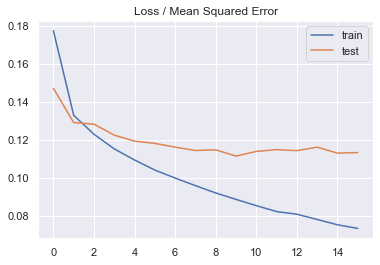

In [132]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()
predict=model.predict(X_test_net)


In [133]:
print(std_scaler.inverse_transform(predict))

[[149902.92 ]
 [ 25131.   ]
 [ 78078.73 ]
 ...
 [173536.03 ]
 [ 96684.95 ]
 [ 14896.522]]


In [134]:
print(std_scaler.inverse_transform(y_test_net))

[124369.98438535    318.7972257    7837.05099296 ... 150646.28130189
  94281.93280881  13099.82863003]
